In [ ]:
import pandas as pd

In [4]:
data = pd.read_excel("stat_x.xlsx")

In [ ]:
data.head()

In [6]:
data.describe()

,distance from residence,Age,Gender,Distance from college
count,158.000000,158.000000,158.000000,151.000000
mean,371.158228,19.208861,0.525316,343.917881
std,312.991164,2.644677,0.500946,341.738894
min,8.000000,14.000000,0.000000,8.000000
25%,60.000000,18.000000,0.000000,49.000000
50%,350.000000,19.000000,1.000000,270.000000
75%,618.750000,20.000000,1.000000,600.000000
max,1954.000000,40.000000,1.000000,1822.000000


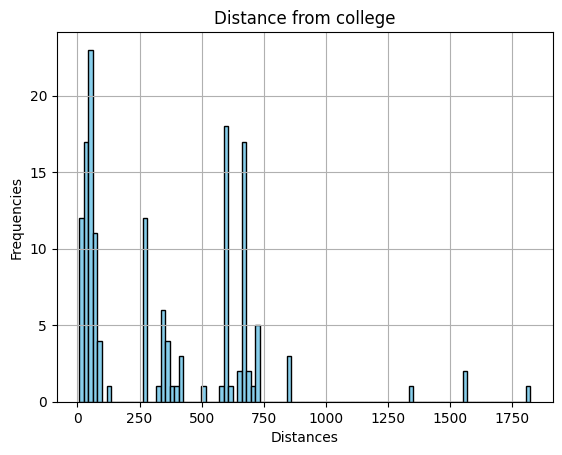

In [7]:
import matplotlib.pyplot as plt
import numpy as np

normalized_data = (data["Distance from college"]- np.mean(data["Distance from college"])) / np.std(data["Distance from college"])

# Plot the normalized data

plt.hist(data["Distance from college"], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Distances')
plt.ylabel('Frequencies')
plt.grid()
plt.title('Distance from college')
# Show plot
plt.show()

Text(0, 0.5, 'Frequency')

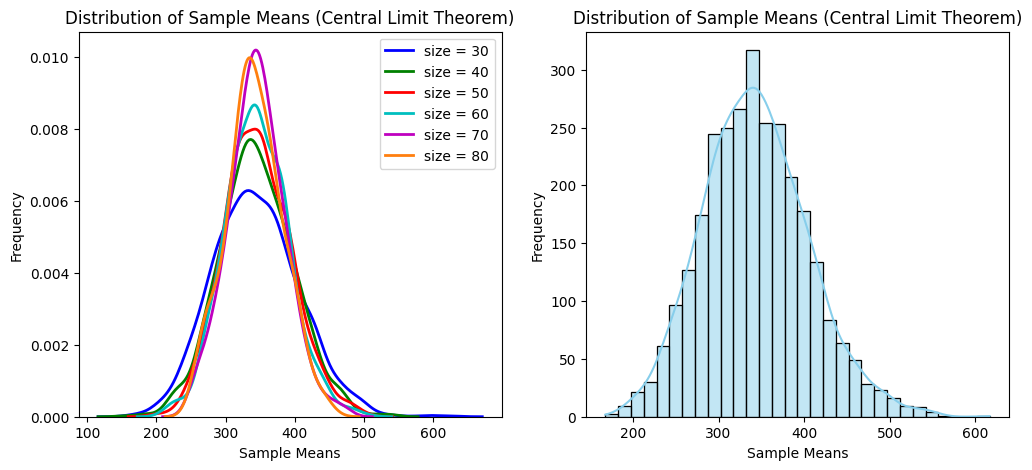

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_cpy = np.array(data["Distance from college"])

# Number of samples and sample size
num_samples = 10000
sample_size = 100

# Generate sample means
sample_sizes = [30, 40, 50, 60, 70, 80]
colors = ['b', 'g', 'r', 'c', 'm', 'tab:orange']
sample_means = []

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for i in range(len(sample_sizes)):
    sample_size = sample_sizes[i]
    sample_means = []
    for j in range(num_samples):
      sample = np.random.choice(data_cpy, sample_size)  # Randomly draw a sample
      sample_means.append(np.mean(sample))  # Calculate the mean of the sample
    sns.kdeplot(sample_means, color=colors[i], linewidth=2, label = f'size = {sample_size}', ax = ax[0])

ax[0].set_title('Distribution of Sample Means (Central Limit Theorem)')
ax[0].set_xlabel('Sample Means')
ax[0].set_ylabel('Frequency')
ax[0].legend()

plt.figure()
# Plot the distribution of the sample means
for j in range(num_samples):
    sample = np.random.choice(data_cpy, 30)  # Randomly draw a sample
    sample_means.append(np.mean(sample))  # Calculate the mean of the sample
sns.histplot(sample_means, kde=True, color='skyblue', bins=30, ax = ax[1])

ax[1].set_title('Distribution of Sample Means (Central Limit Theorem)')
ax[1].set_xlabel('Sample Means')
ax[1].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

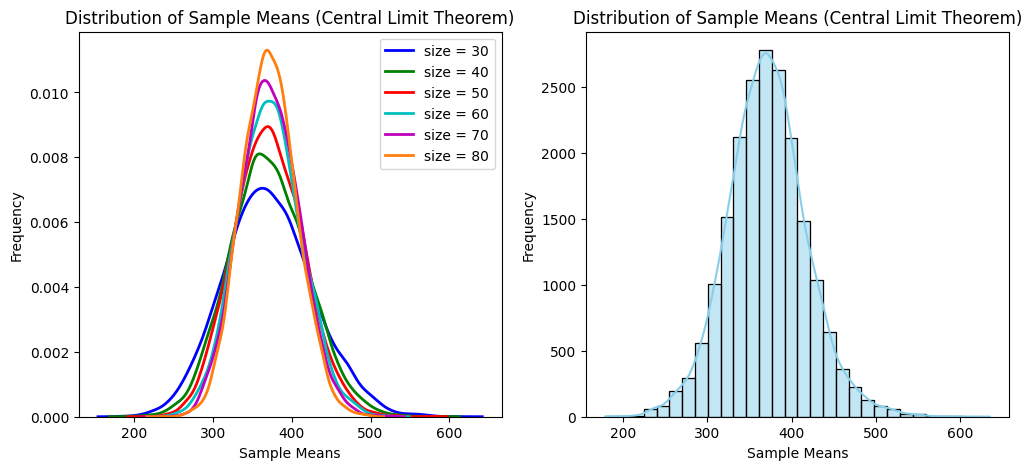

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_cpy = np.array(data["distance from residence"])

# Number of samples and sample size
num_samples = 10000
sample_size = 100

# Generate sample means
sample_sizes = [30, 40, 50, 60, 70, 80]
colors = ['b', 'g', 'r', 'c', 'm', 'tab:orange']
sample_means = []

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for i in range(len(sample_sizes)):
    sample_size = sample_sizes[i]
    sample_means = []
    for j in range(num_samples):
      sample = np.random.choice(data_cpy, sample_size)  # Randomly draw a sample
      sample_means.append(np.mean(sample))  # Calculate the mean of the sample
    sns.kdeplot(sample_means, color=colors[i], linewidth=2, label = f'size = {sample_size}', ax = ax[0])

ax[0].set_title('Distribution of Sample Means (Central Limit Theorem)')
ax[0].set_xlabel('Sample Means')
ax[0].set_ylabel('Frequency')
ax[0].legend()

plt.figure()
# Plot the distribution of the sample means
for j in range(num_samples):
    sample = np.random.choice(data_cpy, 30)  # Randomly draw a sample
    sample_means.append(np.mean(sample))  # Calculate the mean of the sample
sns.histplot(sample_means, kde=True, color='skyblue', bins=30, ax = ax[1])

ax[1].set_title('Distribution of Sample Means (Central Limit Theorem)')
ax[1].set_xlabel('Sample Means')
ax[1].set_ylabel('Frequency')

In [ ]:
one_hot_encoded = pd.get_dummies(data['Duration of stay (check the form description for check in and check out timings)'])
data = pd.concat([data, one_hot_encoded], axis=1)

In [ ]:
data.head()

In [12]:
import numpy as np
from scipy.stats import t


cleaned_data = data["Distance from college"].dropna()  # Drop NaNs
cleaned_data = cleaned_data[~np.isinf(cleaned_data)]  # Remove infinite values
sample_data_1 = np.copy(cleaned_data)

# Step 2: Calculate the sample mean
mean = np.mean(sample_data_1)

# Step 3: Calculate the standard deviation
std_dev = np.std(sample_data_1, ddof=1)  # ddof=1 for sample standard deviation

# Step 4: Calculate the standard error
n = len(sample_data_1)
standard_error = std_dev / np.sqrt(n)

# Step 5: Find the critical t-value
alpha = 0.05
degrees_of_freedom = n - 1
t_critical = t.ppf(1 - alpha/2, degrees_of_freedom)

# Step 6: Calculate the margin of error
margin_of_error = t_critical * standard_error

# Step 7: Calculate the confidence interval
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: (288.96732761980263, 398.86843396960137)




---
#CODE FOR ANALYSING HYPOTHESIS:

The mean distance of students from their college to IIT Hyderabad is not $ = 300$ km.

#Null Hypothesis:
    The mean distance of students' college to IIT Hyderabad is = 300 km

#Alternate Hypothesis:
    The mean distance of students' college to IIT Hyderabad is != 300 km


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Calculate the t-critical value for a two-tailed test
def calculate_t_critical_two_tailed(df, alpha):
    """
    Calculate the critical values for a two-tailed t-distribution
    with given degrees of freedom and alpha level.
    """
    # For two-tailed tests, we divide alpha by 2 to get critical values for both tails
    t_critical_left = t.ppf(alpha / 2, df)  # Left tail
    t_critical_right = t.ppf(1 - alpha / 2, df)  # Right tail
    return t_critical_left, t_critical_right

# Plot the t-distribution with rejection regions for a two-tailed test
def plot_t_distribution_rejection_region_two_tailed(df, alpha, t_s):
    """
    Plot the t-distribution with shaded rejection regions for a two-tailed hypothesis test.
    """
    # Define the range of x values
    x = np.linspace(-5, 5, 1000)

    # Calculate t-critical values for the two-tailed test
    t_critical_left, t_critical_right = calculate_t_critical_two_tailed(df, alpha)

    # Plot the t-distribution
    plt.figure(figsize=(8, 5))
    plt.plot(x, t.pdf(x, df), 'b-', label='t-distribution PDF')

    # Shade the rejection regions (both tails)
    x_fill_left = np.linspace(-5, t_critical_left, 100)
    x_fill_right = np.linspace(t_critical_right, 5, 100)

    plt.fill_between(x_fill_left, t.pdf(x_fill_left, df), color='red', alpha=0.5, label='Left Rejection Region')
    plt.fill_between(x_fill_right, t.pdf(x_fill_right, df), color='red', alpha=0.5, label='Right Rejection Region')

    # Add vertical lines for t-critical and t-sample
    plt.axvline(x=t_critical_left, color='green', linestyle='--', label=f't-critical left: {t_critical_left:.2f}')
    plt.axvline(x=t_critical_right, color='green', linestyle='--', label=f't-critical right: {t_critical_right:.2f}')
    plt.axvline(x=t_s, color='black', linestyle='--', label=f't-sample: {t_s:.2f}')

    # Labels and title
    plt.xlabel('t-value')
    plt.ylabel('Density')
    plt.title('t-Distribution with Rejection Regions (Two-Tailed Test)')
    plt.legend()
    plt.grid(True)
    plt.show()


p-value =  0.11639809224684727
alpha =  0.05
Since p value > alpha, there is not enough evidence to reject null hypothesis


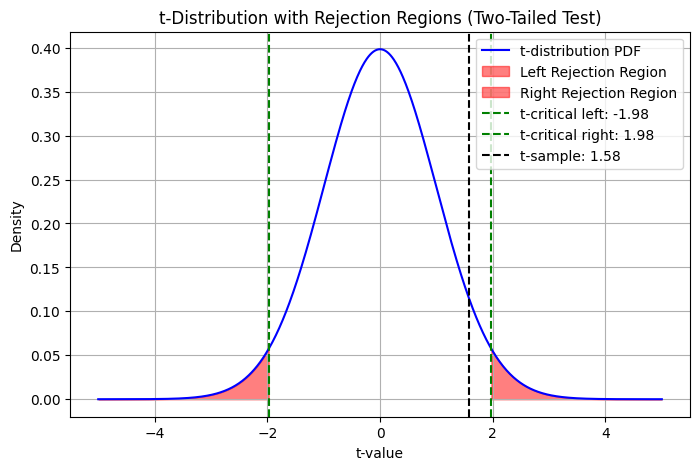

In [10]:
cleaned_data = data["Distance from college"].dropna()  # Drop NaNs
cleaned_data = cleaned_data[~np.isinf(cleaned_data)]  # Remove infinite values

myu_o = 300
df = len(cleaned_data) - 1
t_s = (cleaned_data.mean() - myu_o) / (cleaned_data.std() / np.sqrt(len(cleaned_data)))
p_value = 2 * (1 - t.cdf(t_s, df))
print('p-value = ', p_value)
print('alpha = ', 0.05)
print('Since p value > alpha, there is not enough evidence to reject null hypothesis')
plot_t_distribution_rejection_region_two_tailed(df, 0.05, t_s)



---
#CODE FOR ANALYSING HYPOTHESIS:

Proportion of distances travelled by people being ≤ $100$ is at atleast $25$%

#Null Hypothesis:
    The proportion p < p_0

#Alternate Hypothesis:
    p ≥ p_0
where $p_0 = 0.25$


In [13]:
cleaned_data = data["distance from residence"].dropna()  # Drop NaNs
cleaned_data = cleaned_data[~np.isinf(cleaned_data)]  # Remove infinite values
cleaned_data = np.array(cleaned_data).reshape(len(cleaned_data), 1)
print(len(cleaned_data))
small = 0
for i in cleaned_data:
  if i < 100:
    small += 1
print(small)

158
53


Z-critical: 1.6448536269514722
Z-statistic: 2.4803021457429772
p-value: 0.00656355469578529
Reject the null hypothesis, since p-value is less than 0.05


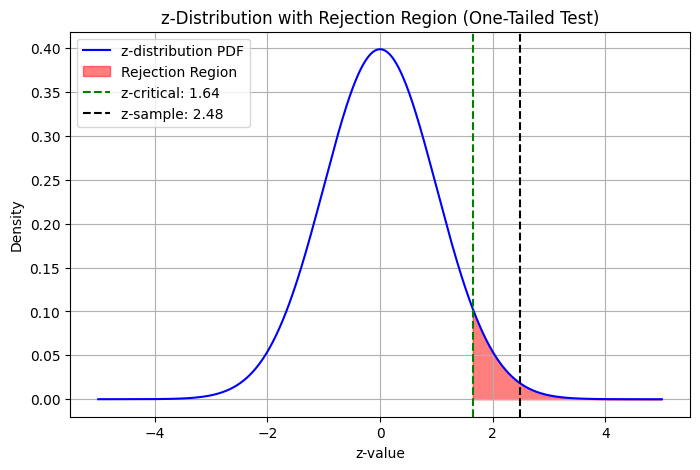

In [17]:
import scipy.stats as stats
import numpy as np

# Define the data
x = small  # Number of successes
n = len(cleaned_data)  # Total number of observations
p0 = 0.25 # Hypothesized population proportion

# Calculate the sample proportion
p_hat = x / n
# Standard error under the null hypothesis
standard_error = np.sqrt(p0 * (1 - p0) / n)

# Z-statistic
z_stat = (p_hat - p0) / standard_error

# p-value for a two-tailed test
p_value = (1 - stats.norm.cdf(z_stat))
# Print the results

# Significance level and critical value for a one-tailed test
alpha = 0.05  # One-tailed significance level
z_critical = stats.norm.ppf(1 - alpha)  # Critical value for the one-tailed test

print("Z-critical:", z_critical)
print("Z-statistic:", z_stat)
print("p-value:", p_value)

# Hypothesis test decision
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis, since p-value is less than 0.05")
else:
    print("Fail to reject the null hypothesis")

# Define the x-axis range for the z-distribution plot
x = np.linspace(-5, 5, 1000)

# Sample z-value (example)
z_sample = z_stat  # Adjust based on your sample's z-score

# Plot the z-distribution
plt.figure(figsize=(8, 5))
plt.plot(x, stats.norm.pdf(x), 'b-', label='z-distribution PDF')
# Shade the rejection region for a one-tailed test (upper tail)
x_fill_right = np.linspace(z_critical, 5, 100)
plt.fill_between(x_fill_right, stats.norm.pdf(x_fill_right), color='red', alpha=0.5, label='Rejection Region')

# Add vertical lines for the z-critical and sample z-value
plt.axvline(x=z_critical, color='green', linestyle='--', label=f'z-critical: {z_critical:.2f}')
plt.axvline(x=z_sample, color='black', linestyle='--', label=f'z-sample: {z_sample:.2f}')

# Add labels and title
plt.xlabel('z-value')
plt.ylabel('Density')
plt.title('z-Distribution with Rejection Region (One-Tailed Test)')
plt.legend()
plt.grid(True)
plt.show()
